In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

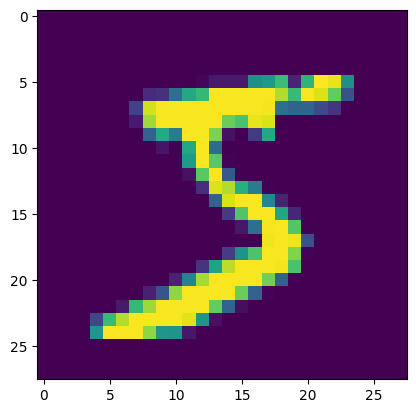

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [13]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0201 - val_loss: 0.0817
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0159 - val_loss: 0.0922
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0135 - val_loss: 0.0856
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0112 - val_loss: 0.0878
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0105 - val_loss: 0.0940
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0947
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0073 - val_loss: 0.0975
Epoch 8/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0078 - val_loss: 0.1042
Epoch 9/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0066 - val_loss: 0.1096
Epoch 10/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.005

In [15]:
y_prob = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred)

0.9743

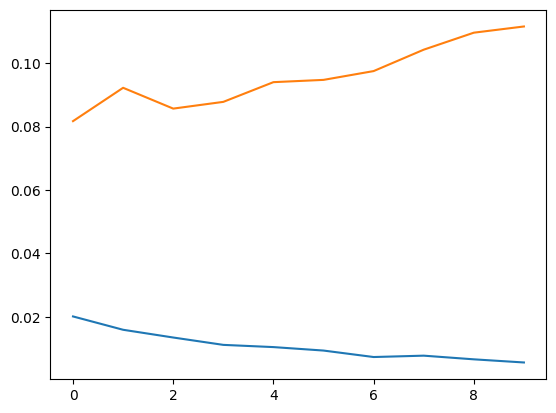

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

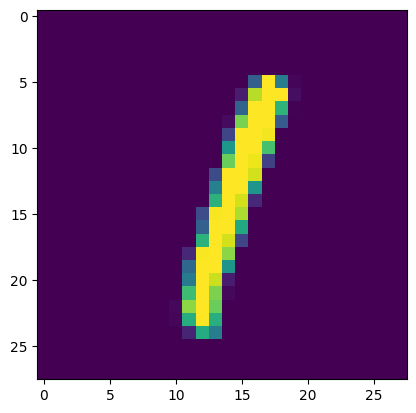

In [36]:
plt.imshow(x_test[5])

In [40]:
model.predict(x_test[5].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 18ms/step


1